In [ ]:
# ler todos os originais

In [ ]:
# preprocessar o pgn, removendo a numeracao e transformando em 
# array de words

In [ ]:
import numpy as np
from IPython.display import clear_output, display

from glob import glob
import os
import os.path
from os import path

import shutil

import cv2
import PIL

import re

In [ ]:
from pathlib import Path

In [ ]:
from matplotlib import pyplot as plt

In [4]:
BASE_DIR= 'C:\mestrado\datasets\handmade\original\scanned_images'
ORG_DIR= BASE_DIR #path.join( BASE_DIR, 'original_clean', 'images')

In [5]:
pad= 10

In [6]:
#executa o processamento para cada arquivo
filenames= glob( os.path.join( ORG_DIR, "*.jpg"))

In [7]:
print( len( filenames))

410


In [8]:
print( filenames[0])

C:\mestrado\datasets\handmade\original\scanned_images\scan.jpg


In [ ]:
#le os arquivos de imagens

In [9]:
def read_text_file( filename):
    f= open( filename, 'r')
    d= f.read()
    f.close()
    return d

In [10]:
def show( img):
    plt.imshow( img)
    plt.title( 'picture')
    plt.show()

In [ ]:
#le imagem e label para 
def read_original( original_image_file):
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( original_image_file).name

    img= cv2.imread( original_image_file)
    label= read_text_file( 
        path.join( Path( original_image_file).parent, 
                  "..", 
                  "labels",
                  filename[0:-3]+"pgn"
                 )
    )
    return img, line_to_words( label)

img, label= read_original( filenames[0])

In [12]:
show( img)

NameError: name 'img' is not defined

In [ ]:
label

In [ ]:
def filter_numeros( line):
    return re.sub( r"\d+\.", '', line)

In [ ]:
filter_numeros( label)

In [ ]:
def filter_chaves( s):
    _in= False
    r= []
    for x in s:
        if _in:
            if x== '}':
                _in= False
            continue

        #not in
        if x== '{':
            _in= True
            continue
            
        #not in & x!= '{'
        r.append( x)
    return ''.join(r)

filter_chaves( 'jdflkasjd{djklsafd} dfasdjf f{dkjfl}jk {}x)')



In [ ]:
def lines_to_words( all_lines):
    #filtered= [re.split( r'###', line)[1].lstrip().rstrip() for line in all_lines]
    filtered= [line.lstrip().rstrip() for line in all_lines]
    filtered= [filter_chaves( line) for line in filtered]
    filtered= [filter_numeros( line) for line in filtered]
    filtered= [line.split() for line in filtered]
    all_words= np.concatenate( filtered)   # matriz para vetor..
    return all_words
    
    #unique, counts= np.unique( all_words, return_counts= True)
    #words= np.asarray( (unique, counts)).T
    #return words

In [ ]:
def line_to_words( line):
    return lines_to_words([line])

In [ ]:
#words= line_to_words( label)

In [ ]:
len( words)

In [ ]:
def write_text_file( filename, data):
    f= open( filename, "w")
    f.write( data)
    f.close()
    #print( "Write text to "+ filename)

In [17]:
def crop_only( img, y, h, x, w):
    crop_img= img[ y:y+h, x:x+w]
    return crop_img

In [ ]:
# 1. Gerar recorte de 8 linhas, tirando a coluna do meio e salvar 
# em 8lines. Nomear como "carnaval_0001_line1_8"
def do_crop_8lines( img):
    crop_img= crop_only( img, 599-pad, 560+2*pad, 467, 774)
    final_img= np.concatenate((
        crop_only( crop_img, 0, crop_img.shape[0], 0, 339), 
        crop_only( crop_img, 0, crop_img.shape[0], 339+96, 339)
    ), axis=1)
    return final_img

def extract_8lines_image( img):
    return do_crop_8lines( img)

def generate_8lines( img, words, image_fullpath):
    if len( words)< 16:
        print( "Menos de 16 movimentos. Skip..")
        return None
    
    folder= path.join( BASE_DIR, "carnaval_8lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_line_1_8"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= extract_8lines_image( img)  #TODO: extrair imagem
    new_pgn= " ".join( words[0:16])  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [ ]:
def crop_4lines( img_crop8):
    #primeiras 4 linhas
    return crop_only( img_crop8, 0, 70*4+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_4lines( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_4lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_line_1_4"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= crop_4lines( img_crop8)  #TODO: extrair imagem
    new_pgn= " ".join( words[0:8])  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [ ]:
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_2lines( img_crop8, linha=0):
    #linha: 0, 1, 2... 6   
    y= linha*70
    return crop_only( img_crop8, y, 70*2+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_2lines( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_2lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..6
    for linha in range(0,7):
    
        # define nome
        new_name= "carnaval_"+filename[18:22]+ "_line_"+str(linha+1)+"_"+ str(linha+3)
        new_image_file= path.join( folder, "images", new_name+ '.jpg')
        new_label_file= path.join( folder, "labels", new_name+ '.pgn')

        new_img= crop_2lines( img_crop8, linha)  #TODO: extrair imagem
        new_pgn= " ".join( words[linha*2:linha*2+4])  #TODO: extrair texto

        # escreve arquivo
        cv2.imwrite( new_image_file, new_img)
        #print( "Write image to  "+ new_image_file)
        write_text_file( new_label_file, new_pgn)

In [ ]:
# 4. Gerar recorte de 1 linhas, para cada linhas nomeando como 
# line_1, line_2. "carnaval_0001_line1"
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_1_line( img_crop8, linha=0):
    #linha: 0, 1, 2... 7   
    y= linha*70
    return crop_only( img_crop8, y, 70+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_1line( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_1line")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..7
    for linha in range(0,8):
    
        # define nome
        new_name= "carnaval_"+filename[18:22]+ "_line_"+str(linha+1)
        new_image_file= path.join( folder, "images", new_name+ '.jpg')
        new_label_file= path.join( folder, "labels", new_name+ '.pgn')

        new_img= crop_1_line( img_crop8, linha)  #TODO: extrair imagem
        new_pgn= " ".join( words[linha*2:linha*2+2])  #TODO: extrair texto

        # escreve arquivo
        cv2.imwrite( new_image_file, new_img)
        #print( "Write image to  "+ new_image_file)
        write_text_file( new_label_file, new_pgn)


In [ ]:
# 5. Gerar recorte de 1 word, para todas as linhas, nomeando como 
# word_1, word_2, word_.... "carnaval_0001_word1"

# 4. Gerar recorte de 1 linhas, para cada linhas nomeando como 
# line_1, line_2. "carnaval_0001_line1"
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_1word( img_crop8, linha, coluna):
    #linha: 0, 1, ...7
    #coluna: 0, 1
    y= linha*70
    x= coluna*339
    return crop_only( img_crop8, y, 70+2*pad, x, 339)

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_1word( img_crop8, words, image_fullpath):
    if len( words)< 16:
        return
    
    folder= path.join( BASE_DIR, "carnaval_1word")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..7
    word= 0
    for linha in range(0,8):
        #0,1,..7
        for coluna in [0,1]:
    
            # define nome
            new_name= "carnaval_"+filename[18:22]+ "_word_"+str(word+1)
            new_image_file= path.join( folder, "images", new_name+ '.jpg')
            new_label_file= path.join( folder, "labels", new_name+ '.pgn')

            new_img= crop_1word( img_crop8, linha, coluna)  #TODO: extrair imagem
            new_pgn= words[word]  #TODO: extrair texto

            # escreve arquivo
            cv2.imwrite( new_image_file, new_img)
            #print( "Write image to  "+ new_image_file)
            write_text_file( new_label_file, new_pgn)
            word= word+1


In [ ]:
len( filenames)

In [ ]:
#TODO: adicionar padding vertical nas imagens

def generate_all( filenames):
    total= len( filenames)
    count= 1
    for f in filenames:
        print( "Processando "+ f+"..."+ str(count)+"/"+str(total))
        img, words= read_original( f)
        #print( words[0:10])
        #print( img.shape)
        #show( img)

        if len( words)< 16:
            print( "NAO TEM 16 MOVIMENTOS. SKIP..")
            continue
        
        img_8crop= generate_8lines( img, words, f)
        #show( img_8crop)
        
        #generate 4 lines
        generate_4lines( img_8crop, words, f)
        #generate 2 lines
        generate_2lines( img_8crop, words, f)
        #generate 1 line
        generate_1line( img_8crop, words, f)
        #generate 1 word
        generate_1word( img_8crop, words, f)
        count= count+1


generate_all( filenames)

In [ ]:
# 1. Gerar recorte de 8 linhas, tirando a coluna do meio e salvar 
# em 8lines. Nomear como "carnaval_0001_line1_8"
def do_crop_full( img):
    return crop_only( img, 570, 1800, 440, 1585)
    
def generate_fullpage( img, words, image_fullpath):
    
    folder= path.join( BASE_DIR, "carnaval_fullpage")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_fullpage"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= do_crop_full( img)  #TODO: extrair imagem
    new_pgn= " ".join( words)  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [ ]:
def generate_all_full( filenames):
    total= len( filenames)
    count= 1
    for f in filenames:
        print( "Processando "+ f+"..."+ str(count)+"/"+str(total))
        img, words= read_original( f)

        if len( words)< 16:
            print( "NAO TEM 16 MOVIMENTOS. SKIP..")
            continue
        
        img_8crop= generate_fullpage( img, words, f)
        count= count+1


generate_all_full( filenames)

In [11]:
# ---------------- NOVO --------------------

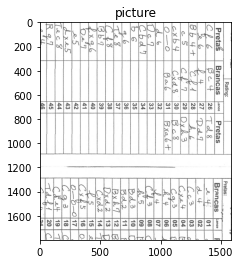

In [18]:
def crop_handmade( filename):
    img= cv2.imread( filename)
    return crop_only( img, 570, 1800, 440, 1585)
    return img
    
show(crop_handmade( filenames[0]))


In [19]:
img= cv2.imread( filenames[0])

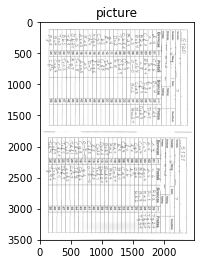

In [20]:
show( img)

In [24]:
imgr= cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

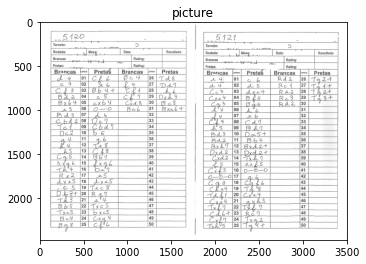

In [25]:
show( imgr)

In [28]:
imgr.shape

(2480, 3504, 3)

In [ ]:
crop_only( imgr, 570, 1800, 440, 1585)

In [ ]:
crop_img= img[ y:y+h, x:x+w]
    return crop_img

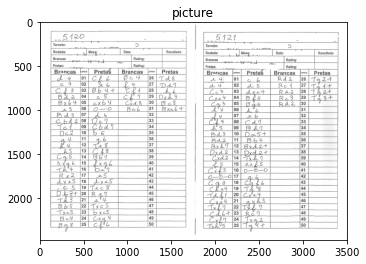

In [29]:
show( imgr[0:2480, 0:3504])

In [33]:
imgr.shape[1]

3504

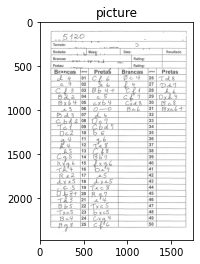

In [31]:
x= show( imgr[0:2480, 0:int(3504/2)])